In [2]:
from types import SimpleNamespace
import torch

In [25]:
class Gen:
    def __init__(self):
        self.W = torch.randn(1)
        self.config = SimpleNamespace(n_instances=1000, n_features=2)
        self.feature_probability=(20 ** -torch.linspace(0, 1, self.config.n_instances))[:, None]
        
    def generate_batch(self, n_batch):
        feat = torch.rand((n_batch, self.config.n_instances, self.config.n_features), device=self.W.device)
        batch = torch.where(
            torch.rand((n_batch, self.config.n_instances, self.config.n_features), device=self.W.device) <= self.feature_probability,
            feat,
            torch.zeros((), device=self.W.device),
        )
        return batch

In [26]:
import matplotlib.pyplot as plt

data = Gen().generate_batch(1)

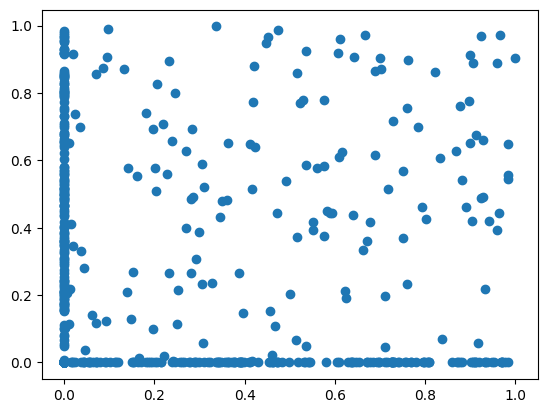

In [27]:
plt.scatter(*data[0].T)